In [49]:
import os
import librosa
import pyaudio
import wave
import IPython.display as ipd
import matplotlib.pyplot as plt
import librosa.display
import scipy
import numpy as np

In [50]:
audio_data = './recordings/0_george_0.wav'
y , sr = librosa.load(audio_data)

In [51]:
librosa.load(audio_data, sr=44100)

(array([-0.04374877, -0.04620348, -0.04589297, ...,  0.00305668,
         0.00253044,  0.        ], dtype=float32),
 44100)

In [52]:
ipd.Audio(audio_data) # run in JupyterNotebook web, not in VS Code but the file is OK

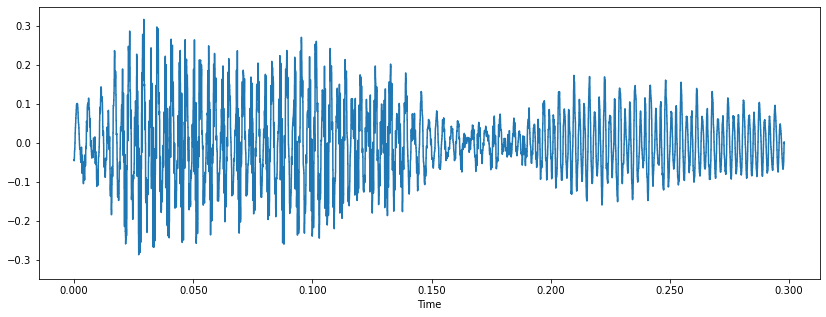

In [53]:
%matplotlib inline

plt.figure(figsize=(14, 5))
librosa.display.waveshow(x, sr=sr)#muestra a 22KHZ mono

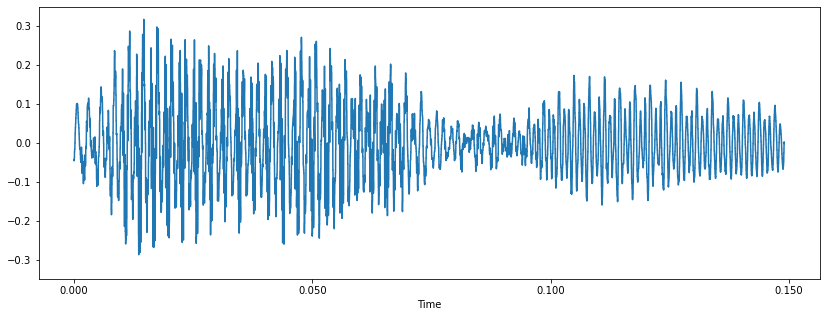

In [54]:
%matplotlib inline

plt.figure(figsize=(14, 5))
librosa.display.waveshow(x, sr=44100)#muestra a 44.1KHz

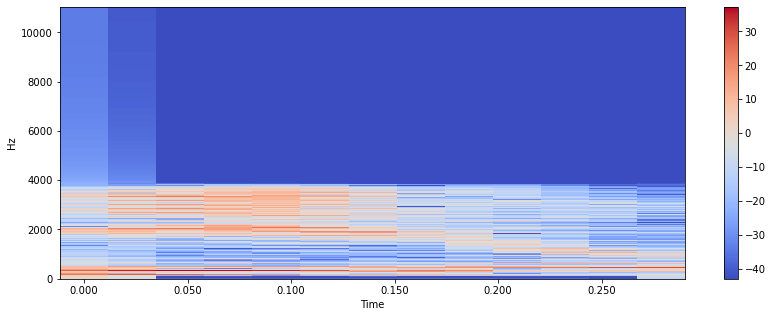

In [55]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

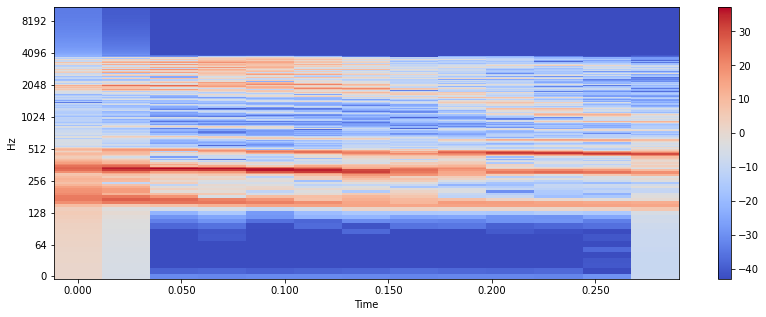

In [56]:
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

## Extracción de características 

### Mel-Frequency Cepstral Coefficient (MFCC)

In [57]:
mfccs = librosa.feature.mfcc(x, sr=sr)
print(mfccs.shape)

(20, 13)


C:\Users\Victor\AppData\Local\Temp/ipykernel_7100/205689933.py:1: FutureWarning: Pass y=[-0.04374877 -0.04589297 -0.03884229 ... -0.00196383  0.00266265
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=sr)


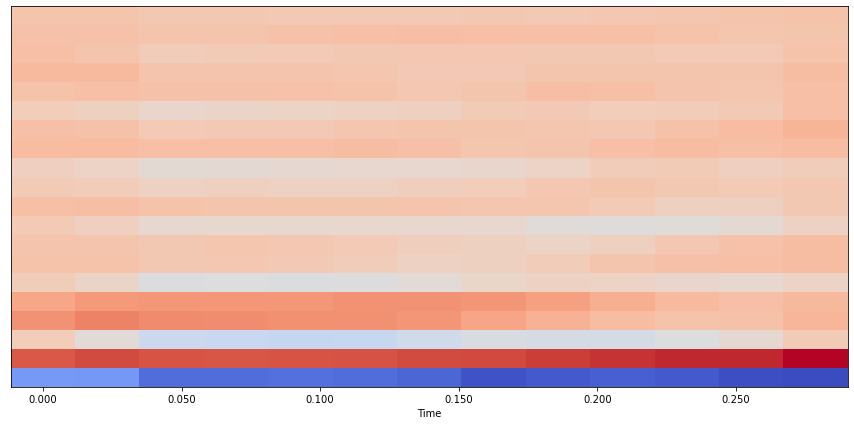

In [58]:
#Displaying  the MFCCs:
plt.figure(figsize=(15, 7))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

### Linear Prediction Coefficients

Text(0.5, 1.0, 'LP Model Forward Prediction')

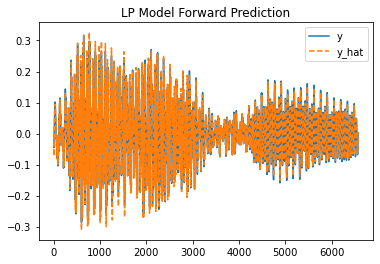

In [59]:
a = librosa.lpc(y, order=2)
b = np.hstack([[0], -1 * a[1:]])
y_hat = scipy.signal.lfilter(b, [1], y)
fig, ax = plt.subplots()
ax.plot(y)
ax.plot(y_hat, linestyle='--')
ax.legend(['y', 'y_hat'])
ax.set_title('LP Model Forward Prediction')

### Chroma feature

In [60]:
chromagram = librosa.feature.chroma_stft(x, sr=sr)
print(chromagram)

[[0.06539346 0.05088108 0.05886653 0.06028871 0.13025936 0.11366576
  0.02389833 0.03498346 0.01227329 0.00520985 0.01648239 0.02341965
  0.00896006]
 [0.02231547 0.00492802 0.00831031 0.01352923 0.01234684 0.01197562
  0.03244838 0.09078653 0.01986099 0.00554206 0.01175683 0.01320571
  0.01120697]
 [0.04177665 0.01977139 0.010538   0.01432456 0.05275325 0.12319334
  0.30770013 0.4269935  0.07340261 0.05554146 0.0644376  0.08013207
  0.07240769]
 [0.39848682 0.33892518 0.27687827 0.3407444  0.72033864 1.
  1.         1.         0.13295002 0.10467027 0.1331563  0.13494344
  0.08320648]
 [1.         1.         1.         1.         1.         0.7160687
  0.3676403  0.85256505 0.18606584 0.02811781 0.02665015 0.0242641
  0.01413884]
 [0.8638101  0.4875227  0.31411883 0.23812662 0.14446951 0.08256677
  0.03647054 0.17849852 0.0912921  0.00884965 0.00252253 0.00247189
  0.00405194]
 [0.35258254 0.07754055 0.04287139 0.04638521 0.03148162 0.02422005
  0.02043626 0.03903592 0.03586644 0.00556

C:\Users\Victor\AppData\Local\Temp/ipykernel_7100/2567734643.py:1: FutureWarning: Pass y=[-0.04374877 -0.04589297 -0.03884229 ... -0.00196383  0.00266265
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  chromagram = librosa.feature.chroma_stft(x, sr=sr)


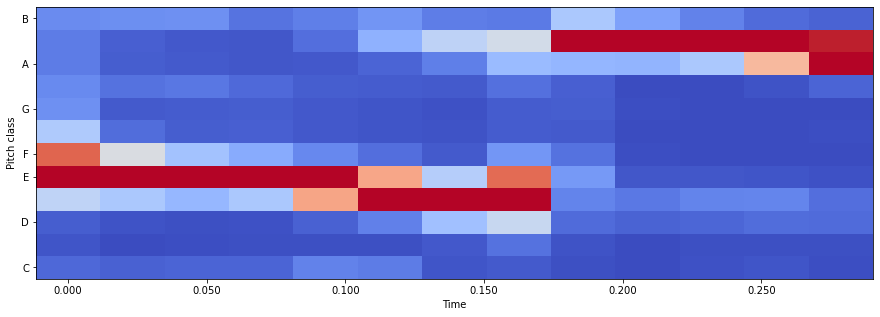

In [61]:
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', cmap='coolwarm')

### RMS root-mean-square

In [62]:
librosa.feature.rms(y=y)

array([[0.08130976, 0.09885337, 0.11279311, 0.12083814, 0.10989127,
        0.09795788, 0.08291037, 0.06111361, 0.05874468, 0.06597603,
        0.07129747, 0.07013452, 0.05652384]], dtype=float32)

In [67]:
S = librosa.magphase(librosa.stft(y, window=np.ones, center=False))[0]
librosa.feature.rms(S=S)
plt.show()

[Text(0.5, 1.0, 'log Power spectrogram')]

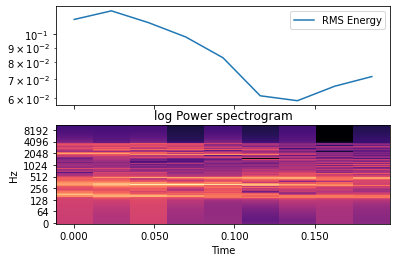

In [68]:
rms = librosa.feature.rms(S=S)
fig, ax = plt.subplots(nrows=2, sharex=True)
times = librosa.times_like(rms)
ax[0].semilogy(times, rms[0], label='RMS Energy')
ax[0].set(xticks=[])
ax[0].legend()
ax[0].label_outer()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[1])
ax[1].set(title='log Power spectrogram')